In [1]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
recession=pd.read_csv('../data/USRECD.csv')
SP500=pd.read_csv('../data/S&P500.csv')

In [3]:
display(SP500.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000


In [4]:
display(recession.head())

,DATE,USRECD
0,1990-01-01,0
1,1990-01-02,0
2,1990-01-03,0
3,1990-01-04,0
4,1990-01-05,0


In [28]:
data = SP500.loc[:, ['Date', 'Adj Close']]
data['Adj Close'] = data['Adj Close'].astype(float)
data = data.set_index('Date')
data.head(5)
type(data)
data = data.pct_change().dropna()
data.head(5)
display(data.shape)
cutoff = 1000
marvok_regression = sm.tsa.MarkovAutoregression(data[:cutoff], k_regimes=2, order=7, switching_ar=True,switching_variance=True)
res = marvok_regression.fit()
display(res.summary())


(8063, 1)

C:\Users\AIR-USER14\anaconda3\envs\markov_regime_switching\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                Adj Close   No. Observations:                  993
Model:             MarkovAutoregression   Log Likelihood                3469.574
Date:                  Fri, 25 Nov 2022   AIC                          -6899.148
Time:                          20:25:15   BIC                          -6801.133
Sample:                               0   HQIC                         -6861.883
                                  - 993                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.758      0.079   -4.27e-05       0.001
sigma2      3.593e-05   2.77e-06     12.989      0.000    3.05e-05    4.13e-05
ar.L1         -0.0201      0.040     -0.507      0.612      -0.098       0.058
ar.L2         -0.0005      0.037     -0.014      0.989      -0.074       0.073
ar.L3         -0.0315      0.040     -0.796      0.426      -0.109       0.046
ar.L4         -0.0811      0.039     -2.091      0.036      -0.157      -0.005
ar.L5         -0.0359      0.042     -0.854      0.393      -0.118       0.046
ar.L6          0.0111      0.037      0.298      0.766      -0.062       0.084
ar.L7         -0.0825      0.036     -2.298      0.022      -0.153      -0.012
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.282      0.778      -0.002       0.002
sigma2         0.0001   2.06e-05      6.902      0.000       0.000       0.000
ar.L1          0.1724      0.096      1.803      0.071      -0.015       0.360
ar.L2         -0.0591      0.097     -0.612      0.541      -0.249       0.130
ar.L3         -0.0658      0.098     -0.669      0.504      -0.259       0.127
ar.L4          0.1229      0.099      1.236      0.216      -0.072       0.318
ar.L5          0.0842      0.103      0.821      0.412      -0.117       0.285
ar.L6         -0.2410      0.100     -2.415      0.016      -0.437      -0.045
ar.L7         -0.0013      0.084     -0.016      0.987      -0.166       0.164
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9760      0.011     92.652      0.000       0.955       0.997
p[1->0]        0.0829      0.039      2.117      0.034       0.006       0.160
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

(993, 2)

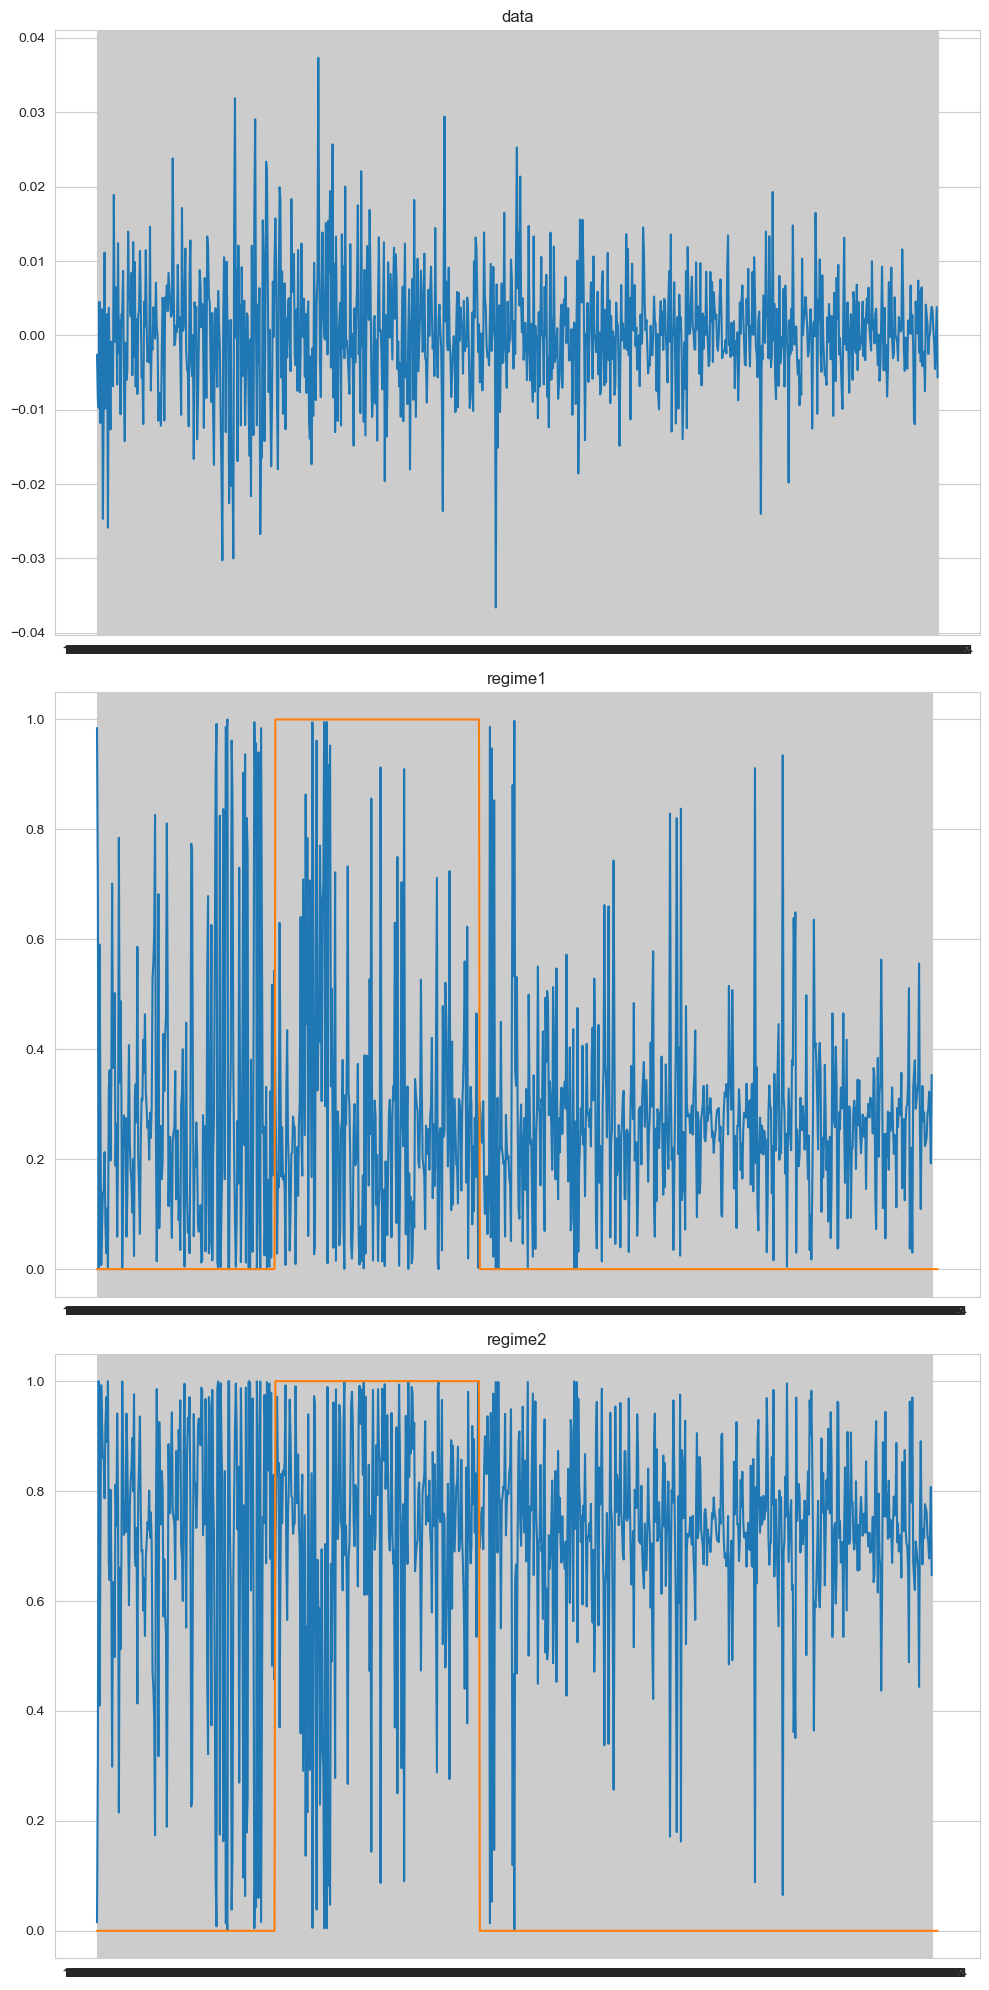

In [20]:
## Plotting


fig, ax = plt.subplots(3, 1, figsize=(10, 20))
ax[0].plot(data[:cutoff])
ax[0].set_title('data')
display(res.smoothed_marginal_probabilities.shape)
ax[1].plot(res.smoothed_marginal_probabilities.loc[:,0])
ax[1].plot(recession['USRECD'][:cutoff])
ax[1].set_title('regime1')

ax[2].plot(res.smoothed_marginal_probabilities.loc[:,1])
ax[2].plot(recession['USRECD'][:cutoff])
ax[2].set_title('regime2')


# ax[3].plot(res.smoothed_marginal_probabilities[2])
# ax[3].set_title('regime3')
# sum = res.smoothed_marginal_probabilities[0] + res.smoothed_marginal_probabilities[1]
plt.tight_layout()


In [7]:
# try voting

In [21]:
type( res.smoothed_marginal_probabilities)

pandas.core.frame.DataFrame

In [22]:
display(res.smoothed_marginal_probabilities[0].shape)

(993,)

In [23]:
display(res.smoothed_marginal_probabilities.shape)

(993, 2)

In [24]:
agg_prob=pd.DataFrame(np.zeros((res.smoothed_marginal_probabilities.shape[0], res.smoothed_marginal_probabilities.shape[1])))

In [25]:
display(agg_prob.shape)

(993, 2)

In [26]:
smooth_len=7
for i in range(len(res.smoothed_marginal_probabilities.loc[:,0])//smooth_len):
    avg_0=res.smoothed_marginal_probabilities.loc[:,0][i:i+smooth_len].mean()
    avg_1=res.smoothed_marginal_probabilities.loc[:,1][i:i+smooth_len].mean()
    print(avg_0,avg_1)
    if avg_1<=avg_0:
        for j in range(smooth_len):
            agg_prob.loc[i*smooth_len+j,0] = 1
            agg_prob.loc[i*smooth_len+j,1] = 0
    else:
        for j in range(smooth_len):
            agg_prob.loc[i*smooth_len+j,0] = 0
            agg_prob.loc[i*smooth_len+j,1] = 1

0.3821772711433897 0.617822728856643
0.26140595882166884 0.7385940411783639
0.18258543244193223 0.8174145675581005
0.21302123715411372 0.7869787628459189
0.14045851428744313 0.8595414857125895
0.09846366213483734 0.9015363378651954
0.11322246891011907 0.8867775310899135
0.10239523906975372 0.897604760930279
0.1296784490415412 0.8703215509584916
0.16102977523805428 0.8389702247619785
0.15881384910550578 0.841186150894527
0.19507603416359462 0.8049239658364381
0.2911230902258617 0.7088769097741711
0.327553811065517 0.6724461889345158
0.38000438230293426 0.6199956176970984
0.40458965699439425 0.5954103430056383
0.37977721620000604 0.6202227838000266
0.3892362491219892 0.6107637508780435
0.34962029267006856 0.6503797073299639
0.28175056952727473 0.7182494304727577
0.3415929614640126 0.6584070385360198
0.3376676799565687 0.6623323200434635
0.33562808690389917 0.664371913096133
0.35461776029100495 0.6453822397090272
0.3170113746576301 0.682988625342402
0.326576673563865 0.673423326436167
0.3

(993, 2)

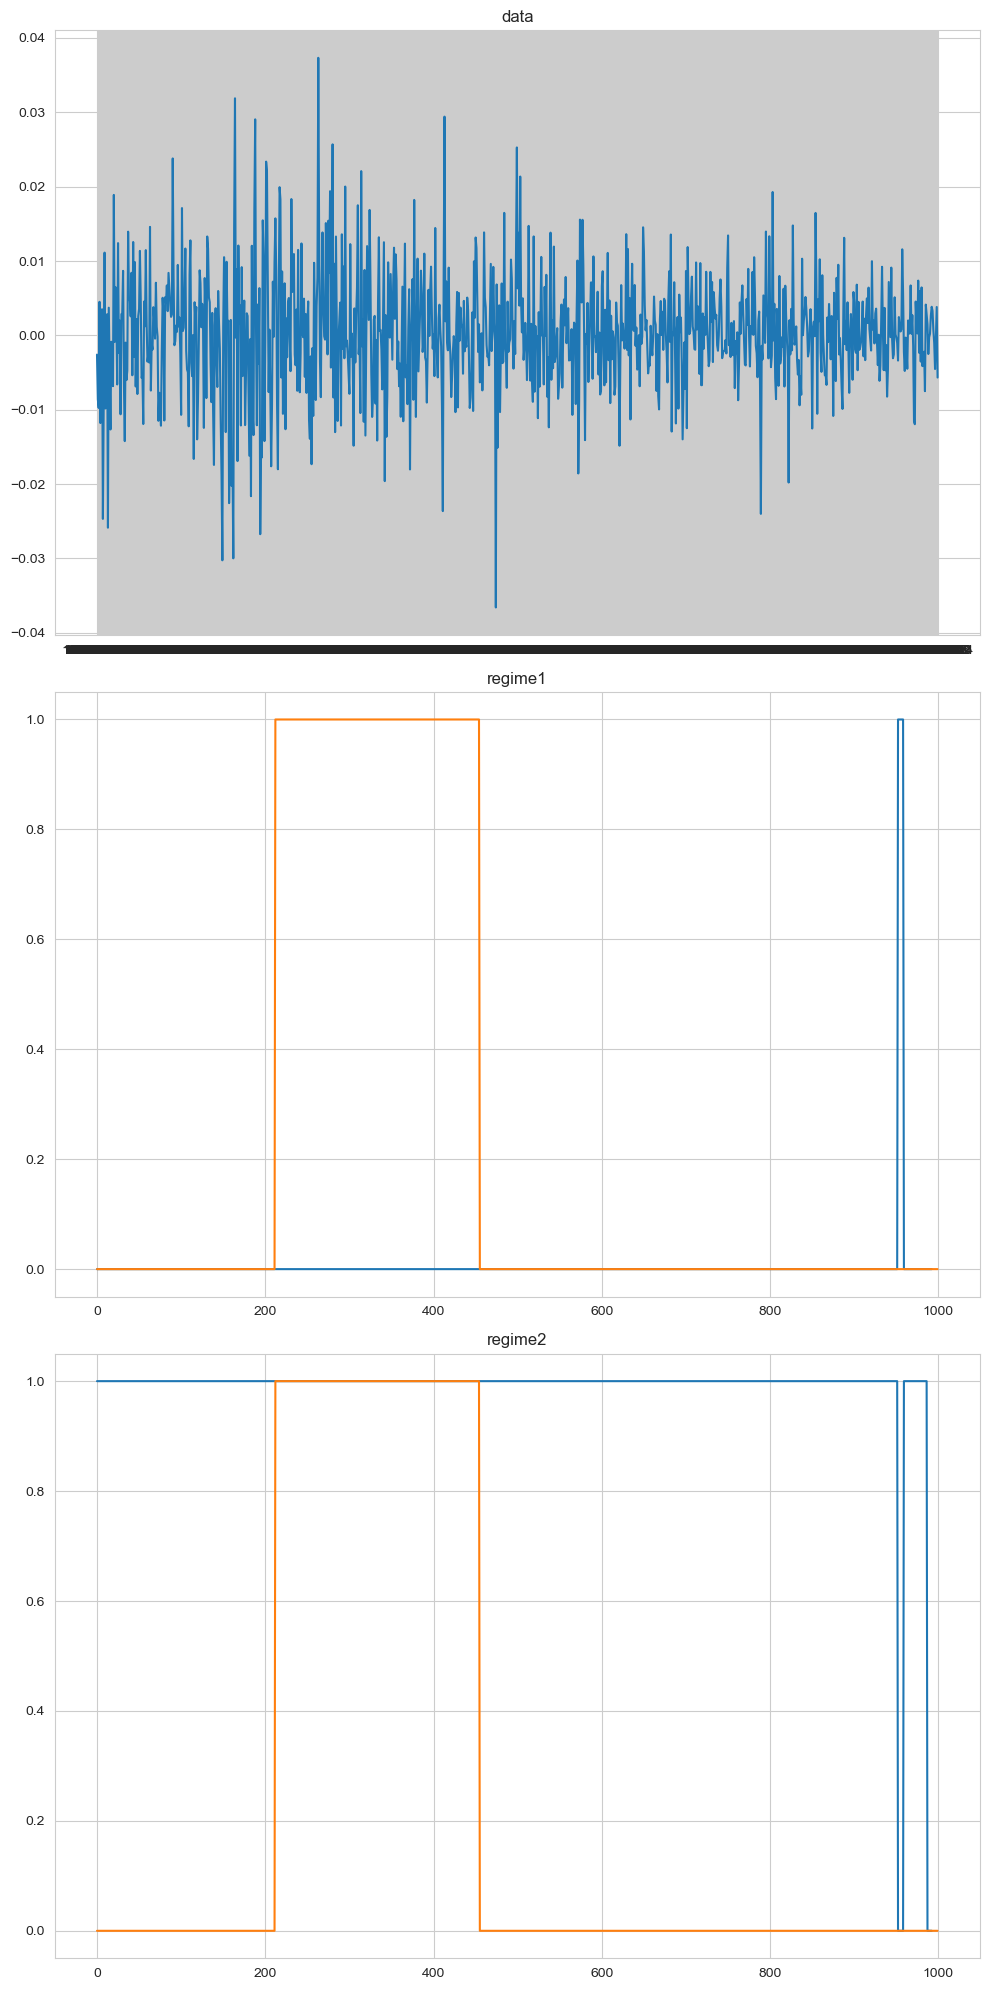

In [27]:

## Plotting

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
ax[0].plot(data[:cutoff])
ax[0].set_title('data')
display(agg_prob.shape)
ax[1].plot(agg_prob[0])
ax[1].plot(recession['USRECD'][:cutoff])
ax[1].set_title('regime1')

ax[2].plot(agg_prob[1])
ax[2].plot(recession['USRECD'][:cutoff])
ax[2].set_title('regime2')

# ax[3].plot(res.smoothed_marginal_probabilities[2])
# ax[3].set_title('regime3')
# sum = res.smoothed_marginal_probabilities[0] + res.smoothed_marginal_probabilities[1]
plt.tight_layout()